In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import os
import h5py

In [24]:
analysis_folder = 'R:\\calcium_decoding\\analysis\\2022_02_25_13_51_36_465142'
#analysis_folder = 'R:\\calcium_decoding\\analysis\\2022_02_16_16_45_04_338058'
analysis_filename = analysis_folder + '\\analysis.p'

IS_MUZZIO_DATA, dataset_label, settings, ds, model_cell_indices, X_train, y_train, X_predict, y_true, model, y_predict, prediction_maps, X_decode, y_decode_true, y_decode_predict, decode_maps = pickle.load( open( analysis_filename, "rb" ) )

Text(0.5, 1.0, 'Example trace')

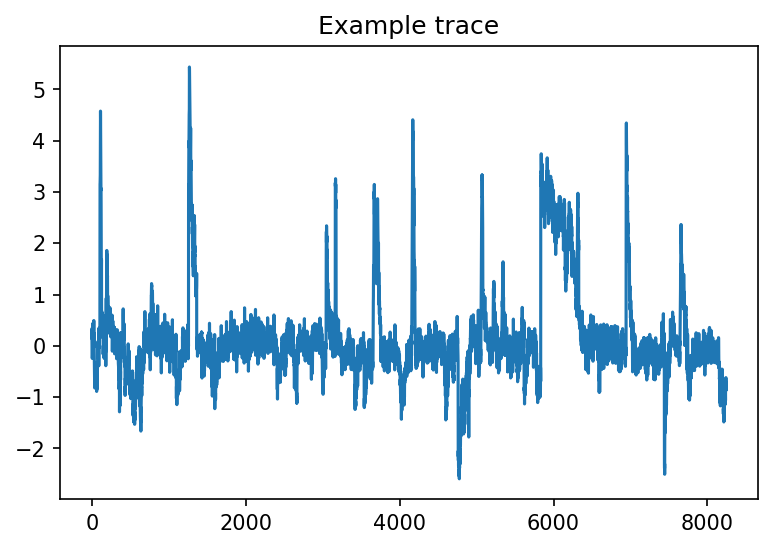

In [25]:
plt.plot(X_train[:,1])
plt.title('Example trace')

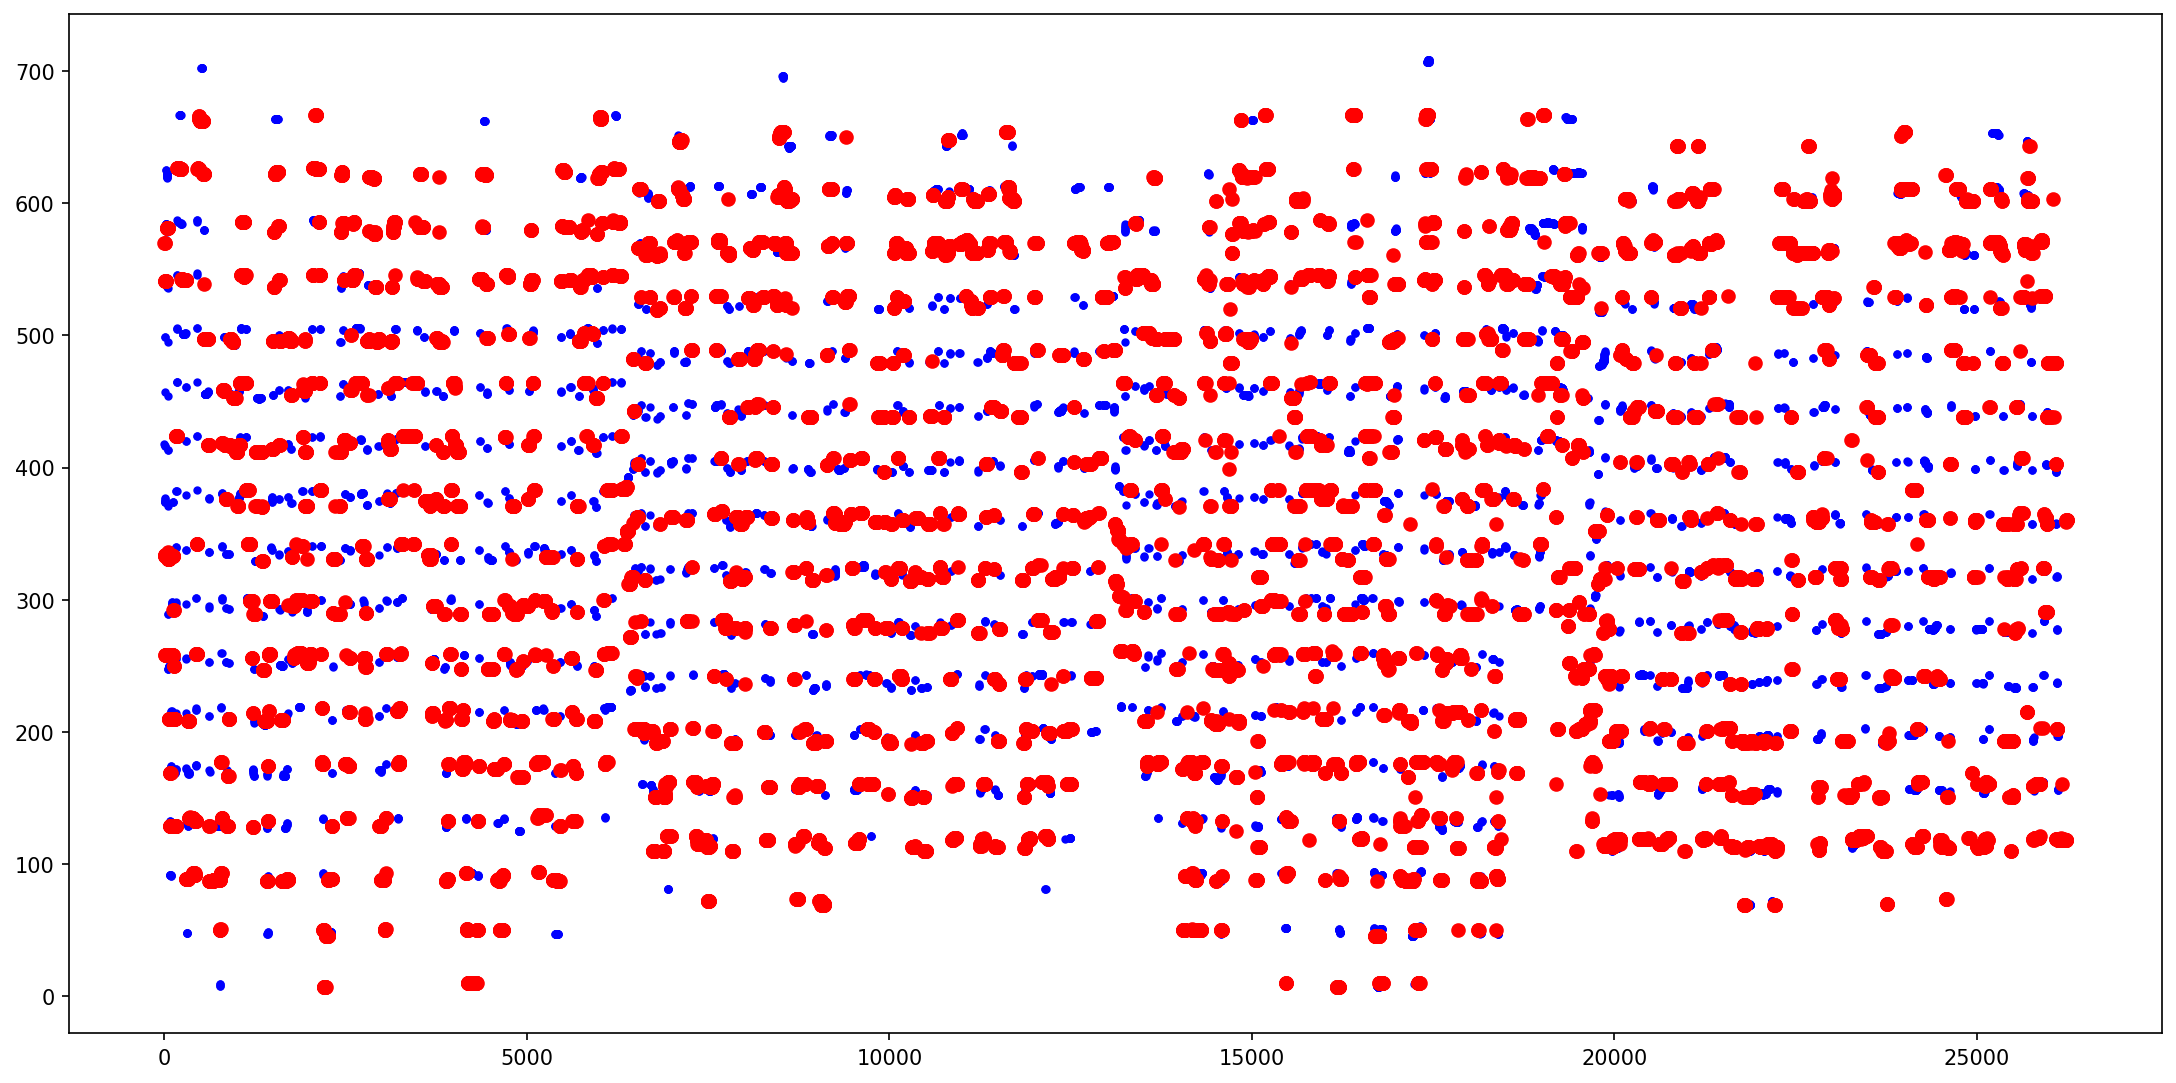

In [26]:
plt.figure(figsize=(18, 9))
plt.plot(np.arange(len(y_decode_true)), y_decode_true, 'b.')
plt.plot(np.arange(len(y_decode_predict)), y_decode_predict, 'ro')
plt.savefig(os.path.join(analysis_folder, 'comparison.png'))
plt.show()

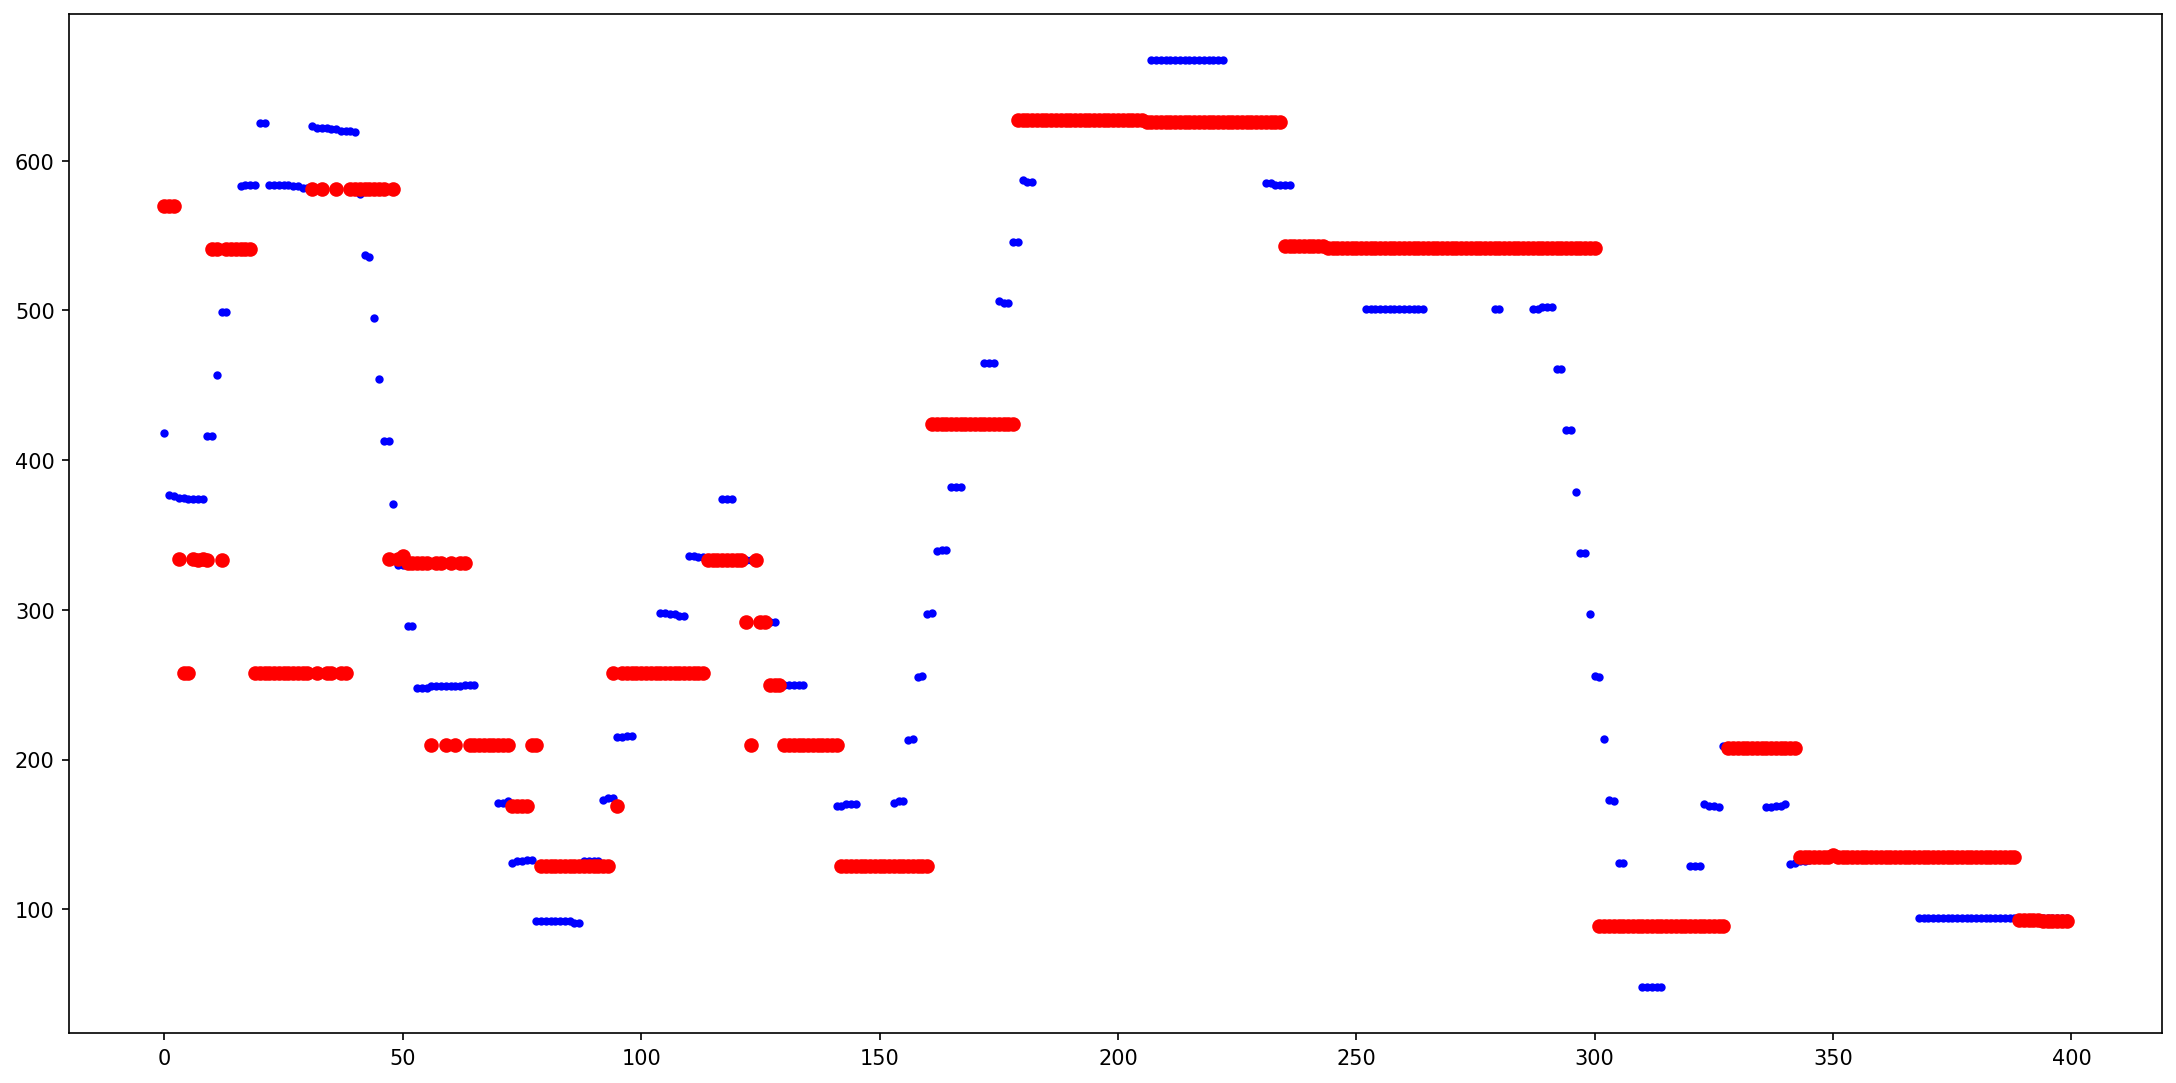

In [27]:
inds = np.arange(400)
x = np.arange(len(y_decode_true))
x_x = x[inds]
y_d = y_decode_true[inds]
y_p = y_decode_predict[inds]

plt.figure(figsize=(18, 9))
plt.plot(x_x, y_d, 'b.')
plt.plot(x_x, y_p, 'ro')
#plt.savefig(os.path.join(analysis_folder, 'comparison.png'))
plt.show()

# This is to make a movie of the predictions (predict data that the model never was trained on)

fig = plt.figure(figsize=(4,5))
fig.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=None, hspace=None)

frame = prediction_maps[0]
im = plt.imshow(frame, extent=[0, frame.shape[1], 0, frame.shape[0]], interpolation='gaussian', origin='upper')
plt.axis('equal')
#plt.plot(x_binned_true, y_binned_true, 'ro', markerfacecolor='r', markersize=10)

#def save_animation():
# Make a movie of the predictions
import matplotlib.animation
import matplotlib.pyplot as plt
import math

# matplotlib.rcParams['animation.embed_limit'] = 2**128
plt.rcParams['animation.embed_limit'] = 2 ** 128

import numpy as np

plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['figure.dpi'] = 150
plt.ioff()

def get_frame_data(frame_num):
    sample_index = frame_num * alpha
    
    frame = prediction_maps[sample_index]

    [y_binned_true, x_binned_true] = np.unravel_index(y_decode[sample_index], ds['arena_size_binned'], order='C')

    return frame, x_binned_true, y_binned_true


fps = 20
num_samples = len(prediction_maps)
alpha = 1
num_frames = math.floor(num_samples / alpha)

fig = plt.figure()
fig.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=None, hspace=None)

frame, x_binned_true, y_binned_true = get_frame_data(1)
im = plt.imshow(frame, extent=[0, frame.shape[1], 0, frame.shape[0]], interpolation='gaussian', origin='upper')
plt.axis('equal')
trueBin, = plt.plot(x_binned_true, y_binned_true, 'ro', markerfacecolor='r', markersize=10)


def init():
    im.set_data(frame)
    trueBin.set_xdata(x_binned_true)
    trueBin.set_ydata(y_binned_true)
    ax = plt.gca()
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)


# x= np.linspace(0,10,100)
def animate(frame_num):
    frame, x_binned_true, y_binned_true = get_frame_data(frame_num)
    im.set_data(frame)
    trueBin.set_xdata(x_binned_true)
    trueBin.set_ydata(y_binned_true)
    return im

my_animation = matplotlib.animation.FuncAnimation(fig, animate, init_func=init, frames=num_frames)
FFwriter = matplotlib.animation.FFMpegWriter(fps=fps)

animation_filename = os.path.join(analysis_folder, 'prediction_maps.mp4')
my_animation.save(animation_filename, writer=FFwriter)
print('Animation saved to ', animation_filename)



# This is to make a movie of the entire dataset (training and prediction portion)

In [ ]:
#def save_animation():
# Make a movie of the predictions
import matplotlib.animation
import matplotlib.pyplot as plt
import math

# matplotlib.rcParams['animation.embed_limit'] = 2**128
plt.rcParams['animation.embed_limit'] = 2 ** 128

import numpy as np

plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['figure.dpi'] = 150
plt.ioff()

def get_frame_data(frame_num):
    sample_index = frame_num * alpha
    
    frame = decode_maps[sample_index]

    [y_binned_true, x_binned_true] = np.unravel_index(y_decode_true[sample_index], ds['arena_size_binned'], order='C')

    return frame, x_binned_true, y_binned_true


fps = 20
num_samples = len(decode_maps)
alpha = 1
num_frames = math.floor(num_samples / alpha)

fig = plt.figure()
fig.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=None, hspace=None)

frame, x_binned_true, y_binned_true = get_frame_data(1)
im = plt.imshow(frame, extent=[0, frame.shape[1], 0, frame.shape[0]], interpolation='gaussian', origin='upper')
plt.axis('equal')
trueBin, = plt.plot(x_binned_true, y_binned_true, 'ro', markerfacecolor='r', markersize=10)


def init():
    im.set_data(frame)
    trueBin.set_xdata(x_binned_true)
    trueBin.set_ydata(y_binned_true)
    ax = plt.gca()
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)


# x= np.linspace(0,10,100)
def animate(frame_num):
    frame, x_binned_true, y_binned_true = get_frame_data(frame_num)
    im.set_data(frame)
    trueBin.set_xdata(x_binned_true)
    trueBin.set_ydata(y_binned_true)
    return im

my_animation = matplotlib.animation.FuncAnimation(fig, animate, init_func=init, frames=num_frames)
FFwriter = matplotlib.animation.FFMpegWriter(fps=fps)

animation_filename = os.path.join(analysis_folder, 'decode_maps.mp4')
my_animation.save(animation_filename, writer=FFwriter)
print('Animation saved to ', animation_filename)



In [14]:
A = np.random.randint(10, size=(10,10))
print(A)

[[2 8 0 3 5 2 1 3 9 6]
 [1 0 0 6 6 6 6 5 8 6]
 [7 3 3 3 2 0 0 8 4 8]
 [9 1 9 2 4 4 0 9 3 1]
 [6 9 7 2 0 0 7 6 1 4]
 [1 6 3 9 3 0 5 4 6 6]
 [8 6 1 7 5 6 7 1 2 4]
 [9 2 0 0 8 9 3 4 7 5]
 [2 8 8 6 2 2 5 4 0 0]
 [8 6 3 6 4 6 4 7 9 6]]


In [18]:
BW = A > 5
print(BW)

[[False  True False False False False False False  True  True]
 [False False False  True  True  True  True False  True  True]
 [ True False False False False False False  True False  True]
 [ True False  True False False False False  True False False]
 [ True  True  True False False False  True  True False False]
 [False  True False  True False False False False  True  True]
 [ True  True False  True False  True  True False False False]
 [ True False False False  True  True False False  True False]
 [False  True  True  True False False False False False False]
 [ True  True False  True False  True False  True  True  True]]


IndexError: index 12 is out of bounds for axis 0 with size 10